<a href="https://colab.research.google.com/github/Shrinandmat/Machine-Learning/blob/main/Pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import h5py
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [42]:
train_dir = '/content/drive/MyDrive/Dataset/TEST' #directory with training images
test_dir = '/content/drive/MyDrive/Dataset/TRAIN' #directory with testing images

In [43]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [44]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 378 images belonging to 5 classes.
Found 215 images belonging to 5 classes.


In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [48]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50
batch_size = 16
model.summary()
Model: "sequential"


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 56, 56, 32)       

In [49]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)


Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 1.6709 - accuracy: 0.1984

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 [==============================] - 22s 672ms/step - loss: 1.6709 - accuracy: 0.1984 - val_loss: 1.6049 - val_accuracy: 0.2326
Epoch 2/50
24/24 [==============================] - 14s 594ms/step - loss: 1.6020 - accuracy: 0.2302 - val_loss: 1.6000 - val_accuracy: 0.2465
Epoch 3/50
24/24 [==============================] - 17s 715ms/step - loss: 1.6007 - accuracy: 0.2090 - val_loss: 1.5947 - val_accuracy: 0.2465
Epoch 4/50
24/24 [==============================] - 15s 619ms/step - loss: 1.5940 - accuracy: 0.2328 - val_loss: 1.5932 - val_accuracy: 0.2465
Epoch 5/50
24/24 [==============================] - 15s 616ms/step - loss: 1.5923 - accuracy: 0.2540 - val_loss: 1.5931 - val_accuracy: 0.2326
Epoch 6/50
24/24 [==============================] - 14s 611ms/step - loss: 1.5707 - accuracy: 0.3042 - val_loss: 1.5860 - val_accuracy: 0.2791
Epoch 7/50
24/24 [==============================] - 15s 617ms/step - loss: 1.4995 - accuracy: 0.3836 - val_loss: 1.5053 - val_accuracy: 0.4326
Epoch 8/50

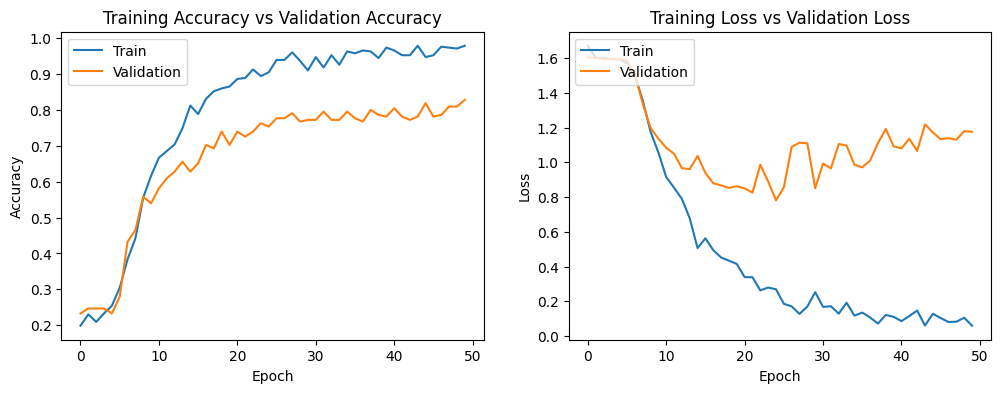

In [50]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [51]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))


7/7 [==============================] - 2s 335ms/step - loss: 1.1756 - accuracy: 0.8279
final train accuracy = 99.47 , validation accuracy = 82.79


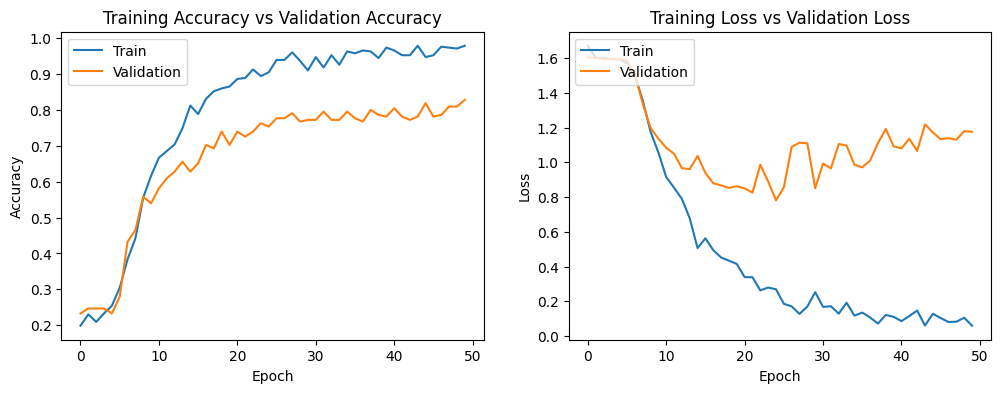

In [52]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [53]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))


7/7 [==============================] - 2s 311ms/step - loss: 1.1756 - accuracy: 0.8279
final train accuracy = 99.74 , validation accuracy = 82.79


In [79]:
model.save('YogaNet_model_1_2.h5')
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('YogaNet_model_1_1.h5')
img = image.load_img('/content/drive/MyDrive/Dataset/TEST/downdog/00000000.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

1/1 [==============================] - 0s 72ms/step
[[1. 0. 0. 0. 0.]]


In [80]:
# convert keras model to tflite
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [81]:
from keras.models import load_model
model = load_model("/content/YogaNet_model_1_2.h5")

TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# or using another method

# Save the model.
with open('tflite_model_another.tflite', 'wb') as f:
  f.write(tflite_model)

File size: 25554.02 Kilobytes


In [82]:

import h5py
import numpy as np
import sys
model.save('YogaNet_model_1_1.h5')
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('YogaNet_model_1_1.h5')
img = image.load_img('/content/drive/MyDrive/Dataset/TEST/downdog/00000000.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 414ms/step
[[1. 0. 0. 0. 0.]]


In [86]:
from google.colab import files

In [87]:
files

<module 'google.colab.files' from '/usr/local/lib/python3.10/dist-packages/google/colab/files.py'>

In [88]:
files.download('tflite_model_another.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>